In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno #to visualize missing values in dataset 
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pokemon/pokemon.csv


In [2]:
poke=pd.read_csv('/kaggle/input/pokemon/pokemon.csv')

In [3]:
poke.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [4]:
poke.tail()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1
800,['Soul-Heart'],0.25,0.5,0.0,1.0,0.5,1.0,2.0,0.5,1.0,...,NaN,801,130,115,65,steel,fairy,80.5,7,1


In [5]:
poke.shape

(801, 41)

In [6]:
poke.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [7]:
poke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [8]:
poke.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [9]:
poke.sort_values('weight_kg')

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
91,['Levitate'],0.25,2.0,1.0,1.0,0.5,0.0,1.0,1.0,2.0,...,50.0,92,100,35,80,ghost,poison,0.1,1,0
788,['Unaware'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,789,29,31,37,psychic,NaN,0.1,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
92,['Levitate'],0.25,2.0,1.0,1.0,0.5,0.0,1.0,1.0,2.0,...,50.0,93,115,55,95,ghost,poison,0.1,1,0
668,"['Flower Veil', 'Symbiosis']",0.50,0.5,0.0,1.0,1.0,0.5,1.0,1.0,1.0,...,0.0,669,61,79,42,fairy,NaN,0.1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,"['Stench', 'Sticky Hold', 'Poison Touch', 'Poi...",0.50,1.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,...,50.0,89,65,100,50,poison,poison,NaN,1,0
102,"['Chlorophyll', 'Harvest', 'Frisk', 'Harvest']",4.00,2.0,1.0,0.5,1.0,0.5,2.0,2.0,2.0,...,50.0,103,125,75,45,grass,psychic,NaN,1,0
104,"['Rock Head', 'Lightningrod', 'Battle Armor', ...",1.00,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,50.0,105,50,80,45,ground,fire,NaN,1,0
719,['Magician'],1.00,4.0,1.0,1.0,1.0,0.0,1.0,1.0,4.0,...,NaN,720,170,130,80,psychic,ghost,NaN,6,1


## **Headling Missing values**

In [10]:
poke.isnull().values.any()

True

In [11]:
poke.isnull()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
797,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
798,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
799,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False


In [12]:
missing_value=poke.columns[poke.isnull().any()].tolist()

In [13]:
print(missing_value)

['height_m', 'percentage_male', 'type2', 'weight_kg']


In [14]:
for col in missing_value:
    print("%s : %.2f"%(col,poke[col].isnull().sum()))
   

height_m : 20.00
percentage_male : 98.00
type2 : 384.00
weight_kg : 20.00


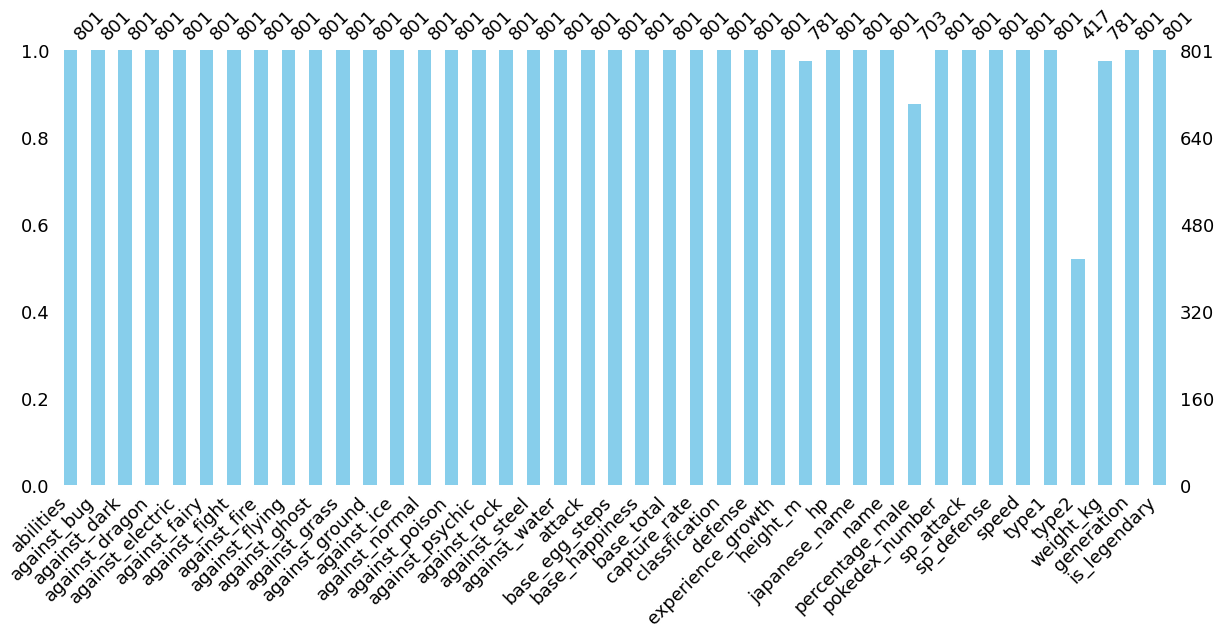

In [15]:
msno.bar(poke,figsize=(20,8),color="skyblue",fontsize=18,labels=True)

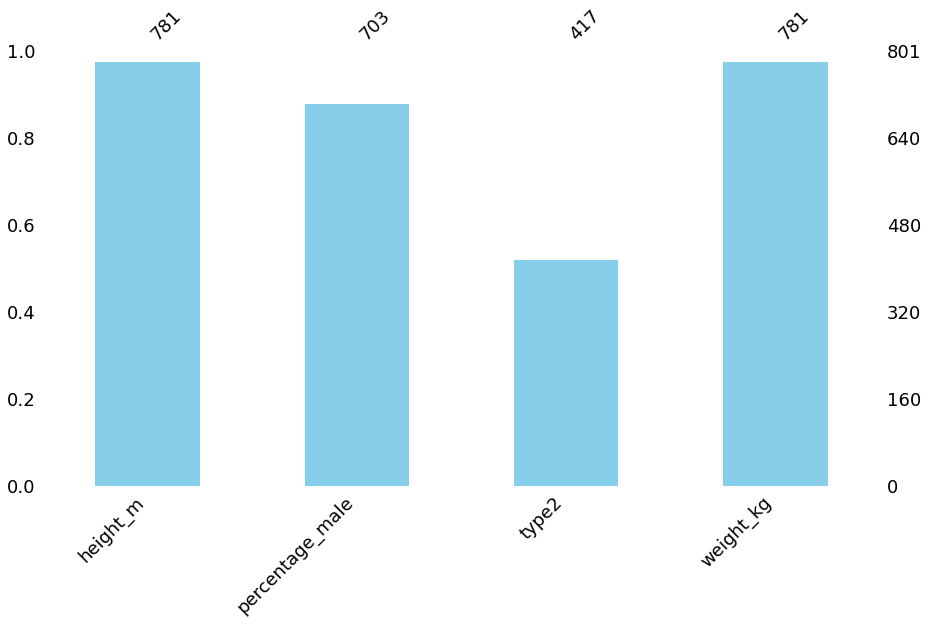

In [16]:
msno.bar(poke[missing_value],figsize=(15,8),color="skyblue",fontsize=18,labels=True)

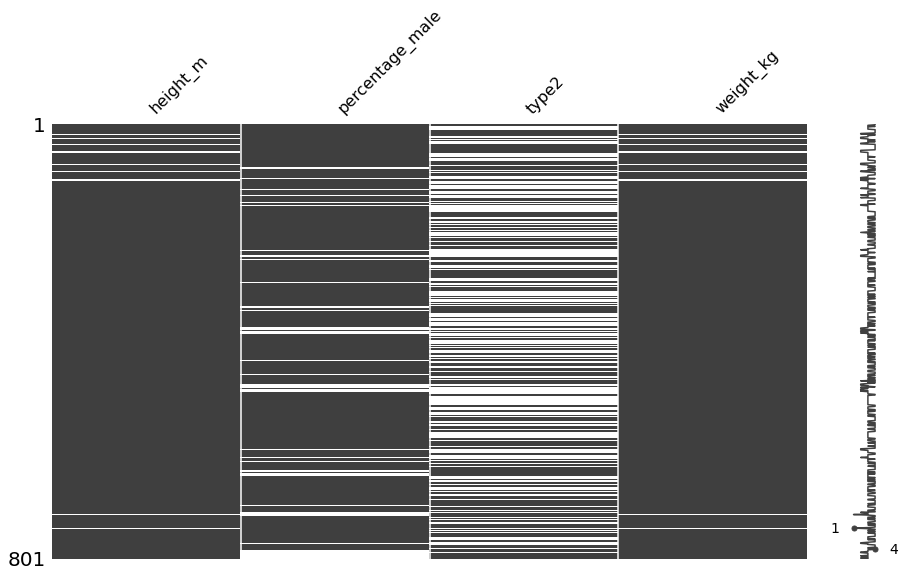

In [17]:
msno.matrix(poke[missing_value],figsize=(15,8))

In [18]:
for col in missing_value:
    print("%s : %d" % (col,poke[col].nunique()))

height_m : 51
percentage_male : 7
type2 : 18
weight_kg : 421


In [19]:
poke['height_m'].fillna(np.int(0),inplace=True)
                        

In [20]:
poke['height_m'].isnull().values.any()
                        

False

In [21]:
poke['percentage_male'].fillna(np.int(-1),inplace=True)


In [22]:
poke['percentage_male'].isnull().values.any()


False

In [23]:
poke['type2'].fillna('No',inplace=True)


In [24]:
poke['type2'].isnull().values.any()


False

In [25]:
poke['weight_kg'].fillna(np.int(0),inplace=True)


In [26]:
poke['weight_kg'].isnull().values.any()


False

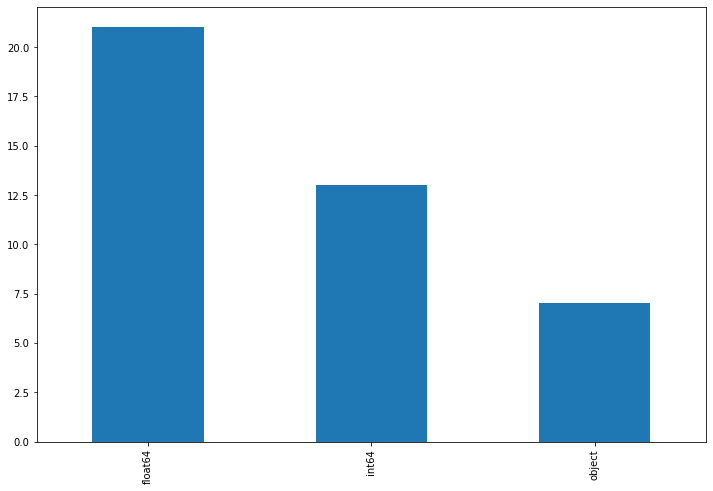

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
pp = pd.value_counts(poke.dtypes)
pp.plot.bar()
plt.show()

In [28]:
y=pd.value_counts(poke['type1'])

In [29]:
y

water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
ground       32
poison       32
dark         29
fighting     28
dragon       27
ghost        27
steel        24
ice          23
fairy        18
flying        3
Name: type1, dtype: int64

In [30]:
y.index

Index(['water', 'normal', 'grass', 'bug', 'psychic', 'fire', 'rock',
       'electric', 'ground', 'poison', 'dark', 'fighting', 'dragon', 'ghost',
       'steel', 'ice', 'fairy', 'flying'],
      dtype='object')

In [31]:
y.values

array([114, 105,  78,  72,  53,  52,  45,  39,  32,  32,  29,  28,  27,
        27,  24,  23,  18,   3])

Text(0, 0.5, 'Count')

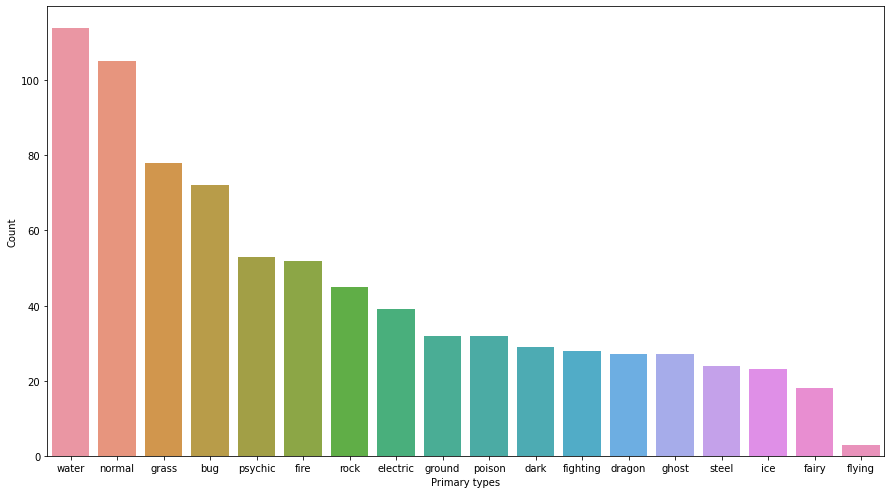

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8.27)
#sns.set_style("darkgrid")
sns.barplot(x=y.index, y=y, data=poke)
plt.xlabel('Primary types')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

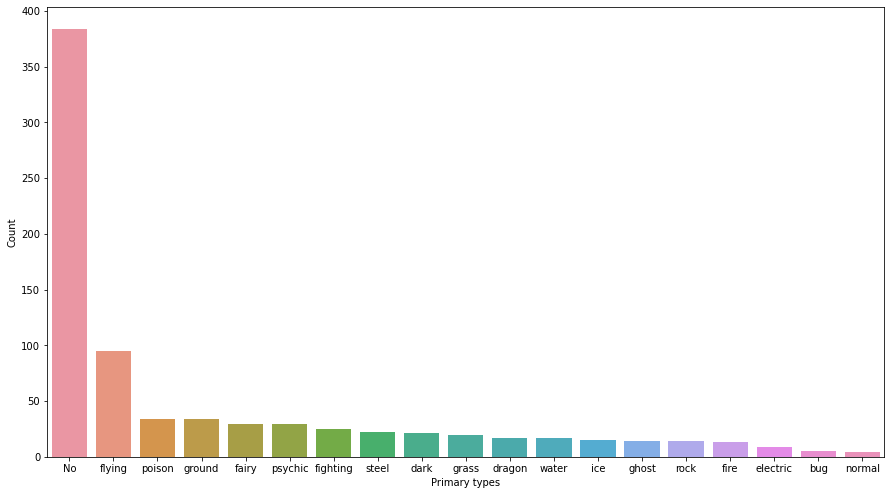

In [33]:
y=pd.value_counts(poke['type2'])
fig, ax = plt.subplots()
fig.set_size_inches(15, 8.27)
sns.barplot(x=y.index, y=y, data=poke)
plt.xlabel('Primary types')
plt.ylabel('Count')

## percentage_male
This feature explains how male the pokemon is. Greater the percentage greater is its masulinity. Here are the list of various values:

1. 100% - purely male.
2. 0% - purely female.
3. -1 - no gender.

In [34]:
poke['percentage_male']

0      88.1
1      88.1
2      88.1
3      88.1
4      88.1
       ... 
796    -1.0
797    -1.0
798    -1.0
799    -1.0
800    -1.0
Name: percentage_male, Length: 801, dtype: float64

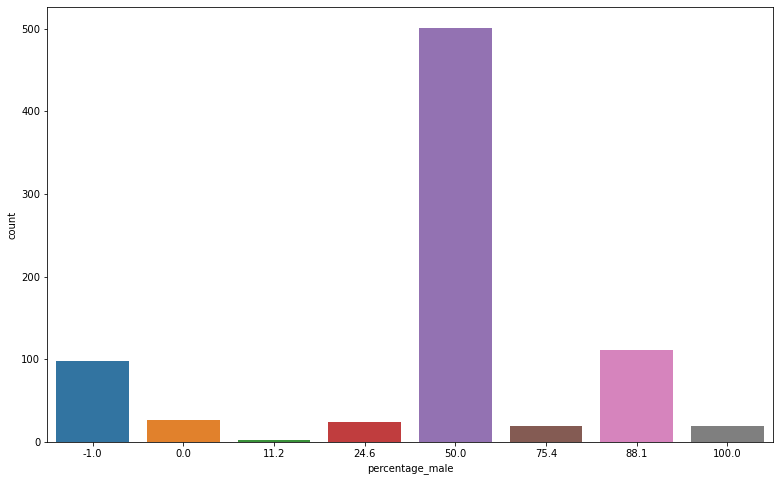

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot(x=poke['percentage_male'],data=poke
             )

In [36]:
print('Purely male pokemon :', len(poke[poke['percentage_male']==100]))
print('Purely female pokemon :', len(poke[poke['percentage_male']==0]))
print('Not male nor female :', len(poke[poke['percentage_male']<0]))
#left pokemon are mixture of male and female    

Purely male pokemon : 19
Purely female pokemon : 27
Not male nor female : 98


## Height and Weight
1. height_m : Height of the Pokemon in metres
2. weight_kg: The Weight of the Pokemon in kilograms
Let us visualize the distribution of Pokemon along the range of height and weight:

In [37]:
poke['height_m'].describe()


count    801.000000
mean       1.134831
std        1.082103
min        0.000000
25%        0.500000
50%        1.000000
75%        1.500000
max       14.500000
Name: height_m, dtype: float64

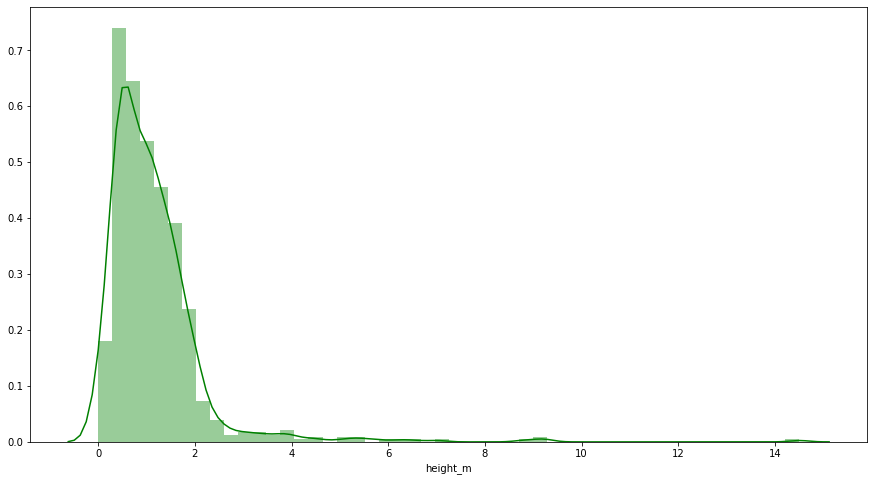

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.distplot(poke['height_m'],color='g')

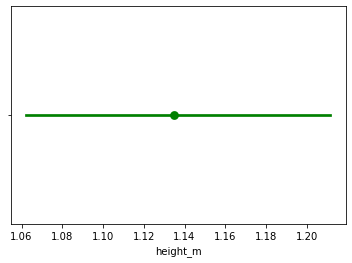

In [39]:
#Average Height
sns.pointplot(poke['height_m'],color='g')

In [40]:
poke['weight_kg'].describe()

count    801.000000
mean      59.845568
std      108.403567
min        0.000000
25%        8.300000
50%       25.500000
75%       61.500000
max      999.900000
Name: weight_kg, dtype: float64

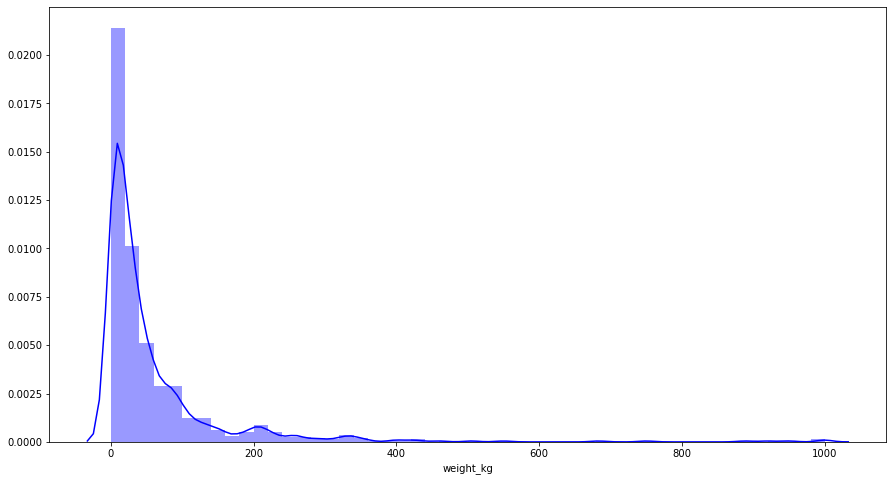

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.distplot(poke['weight_kg'],color='b')

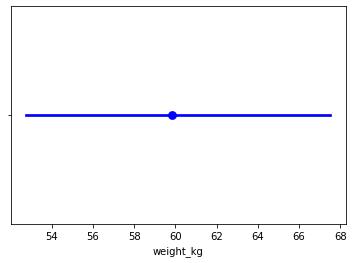

In [42]:
#Average Weight
sns.pointplot(poke['weight_kg'],color='b')

## base_egg_steps
The number of steps required to hatch an egg of the Pokemon.

In [43]:
poke['base_egg_steps']

0       5120
1       5120
2       5120
3       5120
4       5120
       ...  
796    30720
797    30720
798    30720
799    30720
800    30720
Name: base_egg_steps, Length: 801, dtype: int64

In [44]:
poke['base_egg_steps'].unique()
#poke['base_egg_steps'].nunique()

array([ 5120,  3840,  2560,  6400, 10240,  1280,  8960,  7680, 20480,
       30720])

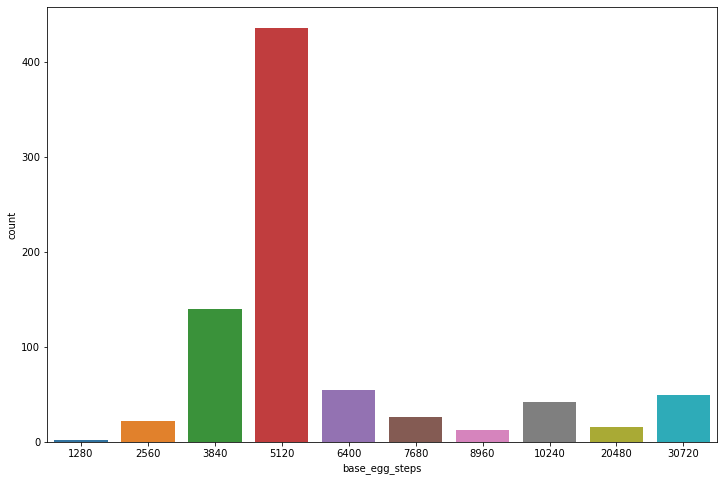

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.countplot(poke['base_egg_steps'])

## experience_growth
The Experience Growth of the Pokemon

In [46]:
poke['experience_growth'].head()

0    1059860
1    1059860
2    1059860
3    1059860
4    1059860
Name: experience_growth, dtype: int64

In [47]:
poke['experience_growth'].sort_values().unique()

array([ 600000,  800000, 1000000, 1059860, 1250000, 1640000])

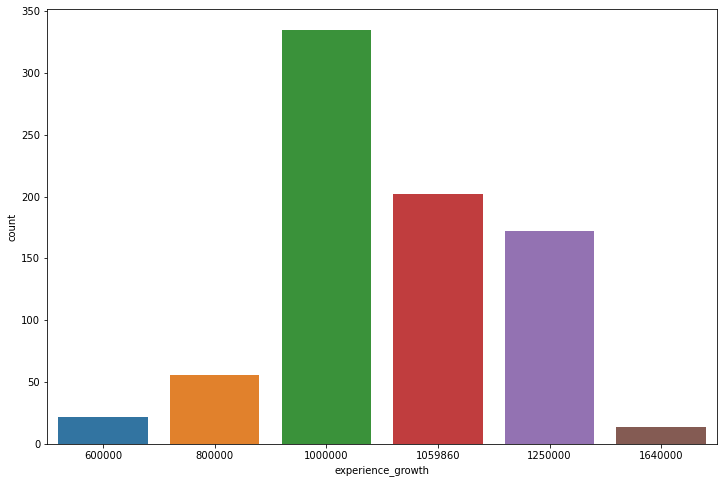

In [48]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.countplot(poke['experience_growth'])

## base_happiness
Base Happiness of the Pokemon.

In [49]:
poke['base_happiness'].describe()

count    801.000000
mean      65.362047
std       19.598948
min        0.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      140.000000
Name: base_happiness, dtype: float64

In [50]:
poke['base_happiness'].unique()

array([ 70, 140,  35,   0, 100,  90])

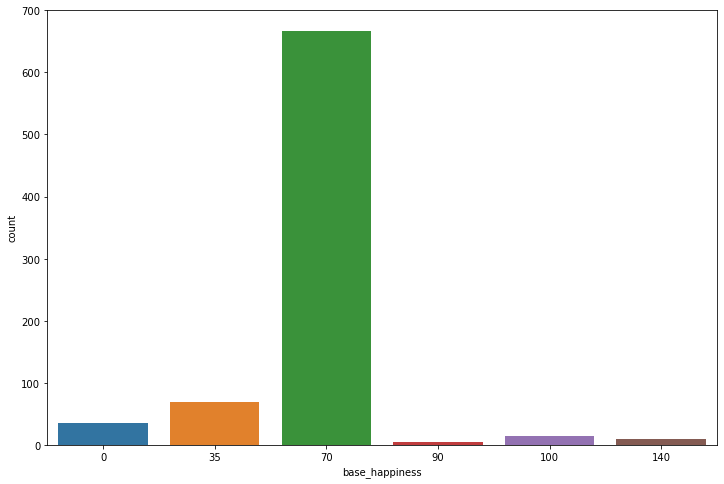

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.countplot(poke['base_happiness'])

## attack and defense of Pokemon
The Base Attack and Defense of the Pokemon.

In [52]:
poke.attack

0       49
1       62
2      100
3       52
4       64
      ... 
796    101
797    181
798    101
799    107
800     95
Name: attack, Length: 801, dtype: int64

In [53]:
poke.attack.unique()

array([ 49,  62, 100,  52,  64, 104,  48,  63, 103,  30,  20,  45,  35,
        25, 150,  60,  80,  56,  71,  90,  95,  55,  85,  75,  47,  92,
        57,  72, 102,  70,  41,  67,  50,  65,  82, 105, 110, 130,  40,
       120,  73,   5, 125,  83, 155,  10, 115, 135,  84, 134,  46,  76,
        38,  58,  33, 185, 164, 160,  51,  91, 140,  43,  78,  81,  15,
       165,  68,  23, 145, 180,  89, 109,  66,  86,  42,  29,  69,  94,
       136,  93,  24, 170, 112,  61, 106, 132, 123,  88,  53,  98,  77,
        27, 117, 108,  44,  87, 147,  74, 124,  97, 129, 128, 107,  59,
        36,  22,  54, 121, 131, 137, 113, 139, 101, 181])

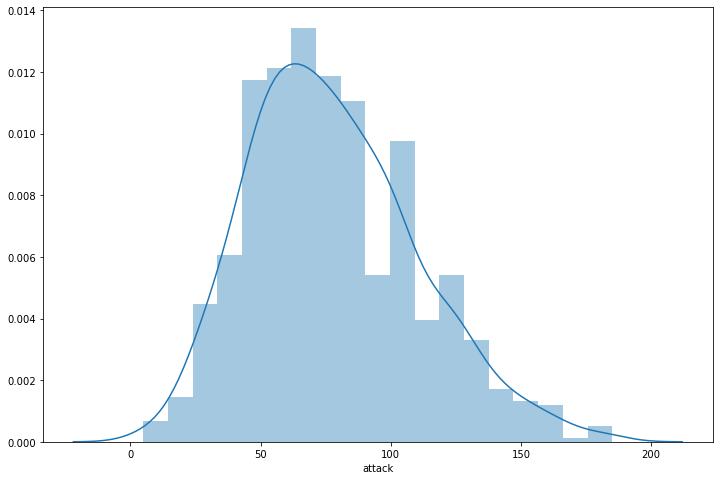

In [54]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.distplot(poke.attack)

In [55]:
poke.defense


0       49
1       63
2      123
3       43
4       58
      ... 
796    103
797    131
798     53
799    101
800    115
Name: defense, Length: 801, dtype: int64

In [56]:
poke.defense.unique()

array([ 49,  63, 123,  43,  58,  78,  65,  80, 120,  35,  55,  50,  30,
        40,  70,  44,  69,  90,  52,  67,  87,  57,  77,  48,  73,  75,
        20,  45,  85,  60,  95,  15, 100, 115, 130, 180, 160, 110,  53,
        79,   5, 109, 125, 105,  64,  34,  38,  28,  42, 140, 230,  62,
        37,  10, 150,  41,  61,  25,  32,  23, 135,  83,  97, 200,  71,
        68,  88,  51, 118, 168, 102,  66,  94,  47,  86, 116, 108,  72,
        56,  76, 145, 107, 106,  39, 126,  59,  99,  89, 103, 133,  82,
        91, 131,  84, 112, 129, 122,  54,  33, 119, 184, 121,  74, 152,
        92,  98,  31, 139, 101])

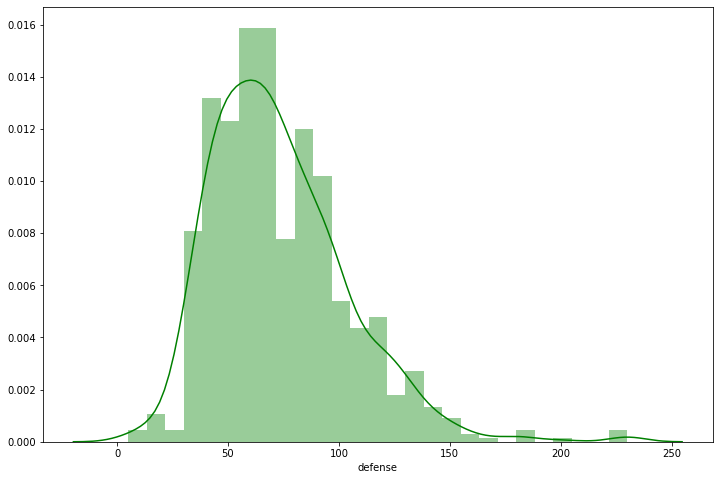

In [57]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.distplot(poke.defense,color='g')

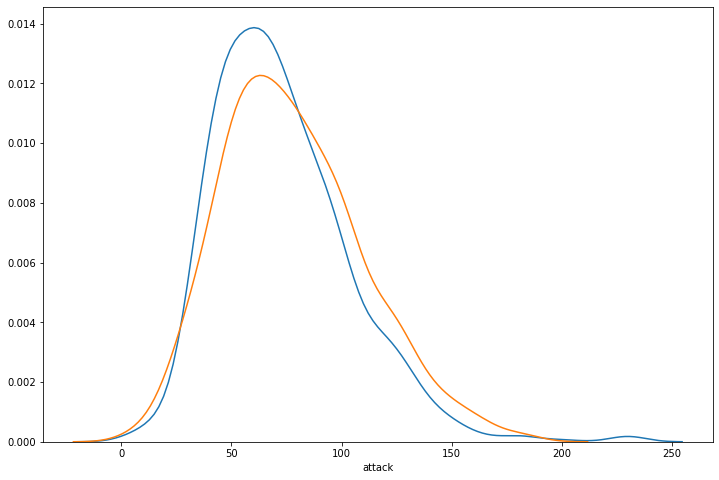

In [58]:
fig,ax = plt.subplots()
fig.set_size_inches(12,8)
sns.distplot(poke['defense'],hist=False)
sns.distplot(poke['attack'],hist=False)

## speed
The Base Speed of the Pokemon

In [59]:
poke.speed

0       45
1       60
2       80
3       65
4       80
      ... 
796     61
797    109
798     43
799     79
800     65
Name: speed, Length: 801, dtype: int64

In [60]:

poke.speed.nunique()

113

In [61]:
poke.speed.unique()

array([ 45,  60,  80,  65, 100,  43,  58,  78,  30,  70,  50,  35, 145,
        56,  71, 121,  72,  77,  55,  90, 110,  40,  41,  76,  85, 109,
        20,  25, 115,  95, 105, 150,  15,  75, 130,  42,  67,  87,  63,
        68,  93,  81,  48, 140,  91,  33,   5,  83,  51, 125, 160,  28,
       135,  10,  23,  32,  52,  97, 120, 180,  31,  36,  61, 108,  66,
        34,  39, 112,  74,  84,  82,  92,  47,  46,  86, 127, 113, 106,
        64, 101,  24,  29, 116, 114,  88,  69,  57,  98,  22,  44,  59,
        79, 103,  38, 128,  99,  73, 104, 132,  62, 126,  89, 102,  49,
       118,  54, 123, 124,  27, 117,  96,  37, 151])

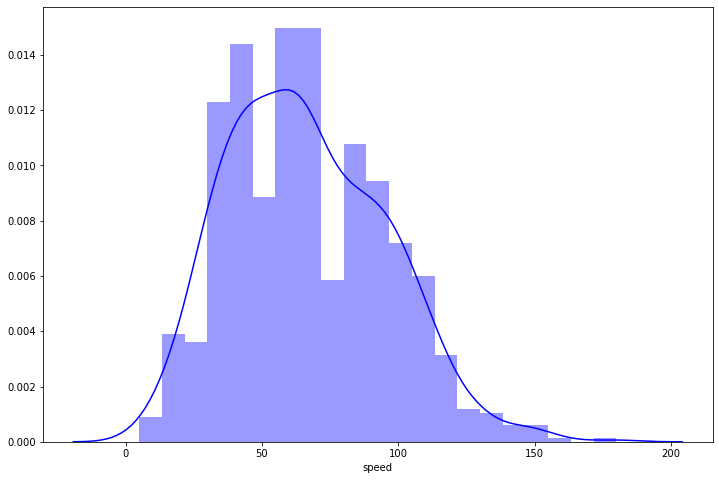

In [62]:
fig,ax = plt.subplots()
fig.set_size_inches(12,8)
sns.distplot(poke.speed,color='b')

In [63]:
print('Fastest Pokemon: {}'.format(poke.name[poke['speed'].idxmax()] ))
print('Slowest Pokemon: {}'.format(poke.name[poke['speed'].idxmin()] ))


Fastest Pokemon: Deoxys
Slowest Pokemon: Shuckle


## generation
The numbered generation which the Pokemon was first introduced

In [64]:
poke['generation']

0      1
1      1
2      1
3      1
4      1
      ..
796    7
797    7
798    7
799    7
800    7
Name: generation, Length: 801, dtype: int64

In [65]:
poke['generation'].unique()

array([1, 2, 3, 4, 5, 6, 7])

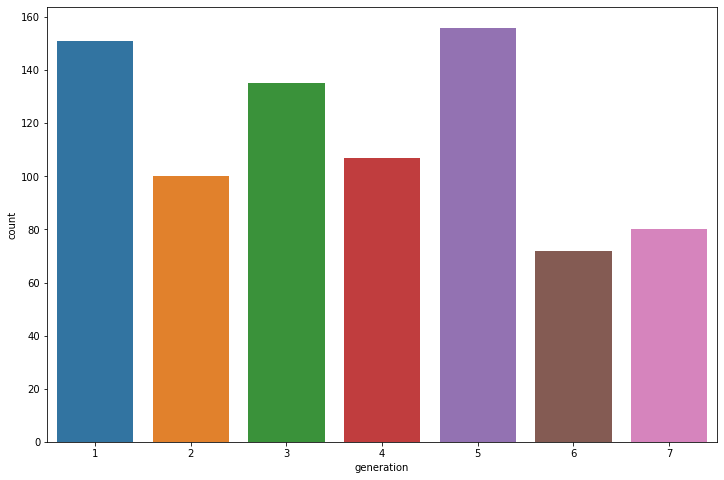

In [66]:
fig,ax = plt.subplots()
fig.set_size_inches(12,8)
sns.countplot( poke['generation'])

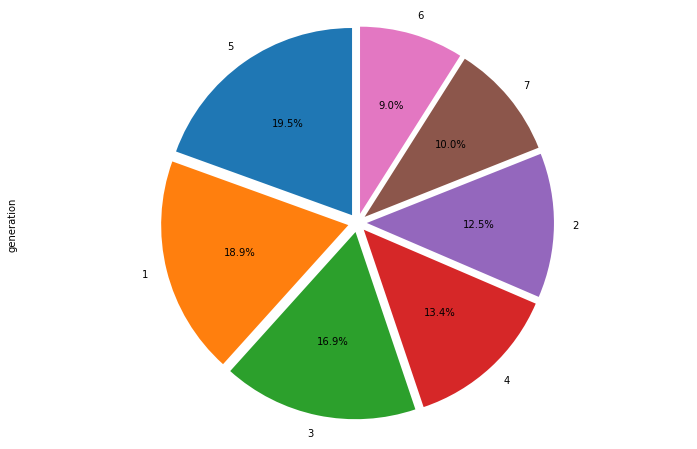

In [67]:
fig,ax=plt.subplots()
fig.set_size_inches(12,8)
pp = pd.value_counts(poke.generation)
pp.plot.pie(startangle=90, autopct='%1.1f%%', explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05))
plt.axis('equal')
plt.show()